In [57]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bach_weights = '/Users/ashleyzhang/Desktop/anticipation/anticipation/bach_weight.json'

with open(bach_weights, 'r') as file:
    data = json.load(file)

print(type(data))
print(data.keys())

attention_weights = data["attention_weights"]


<class 'dict'>
dict_keys(['music', 'attention_weights'])


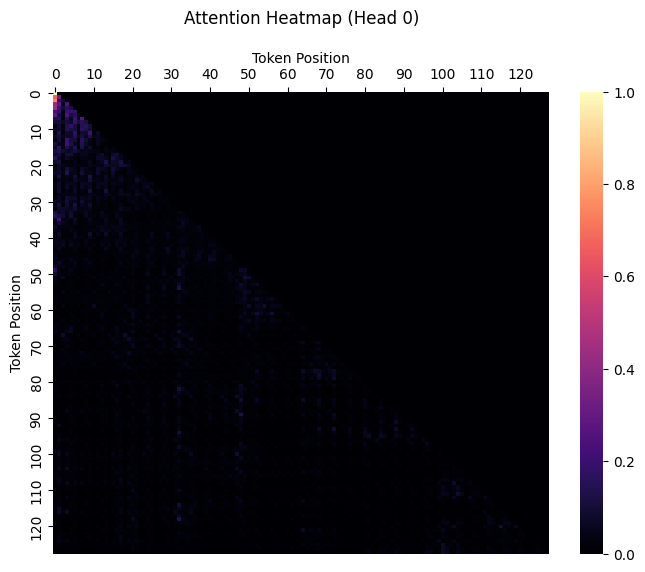

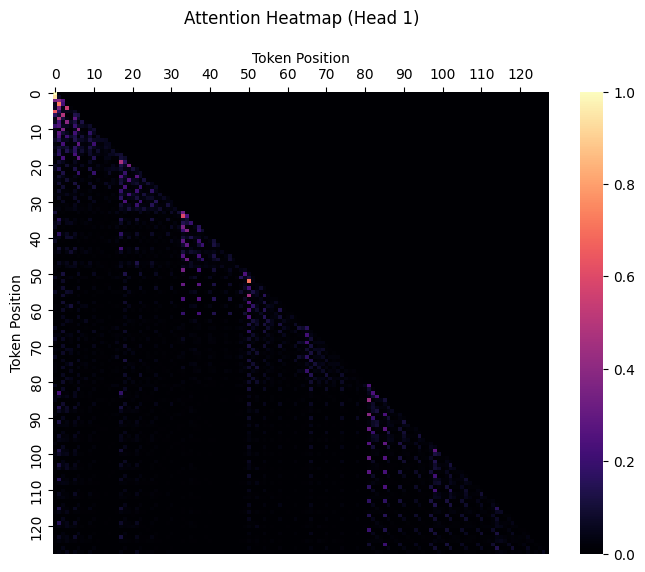

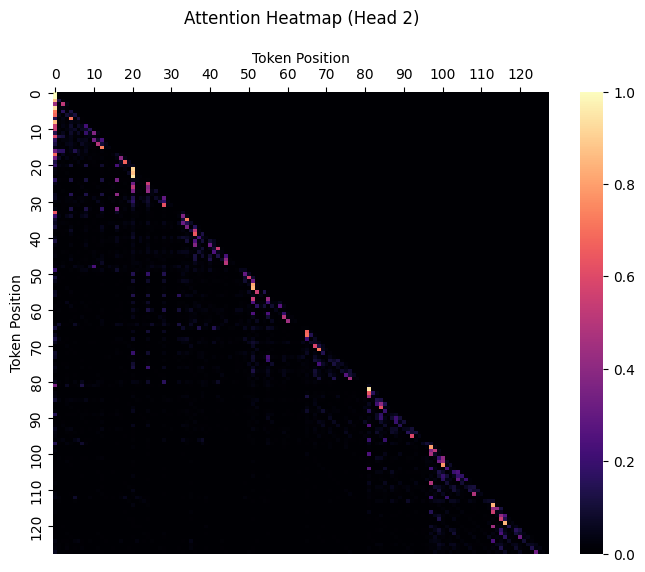

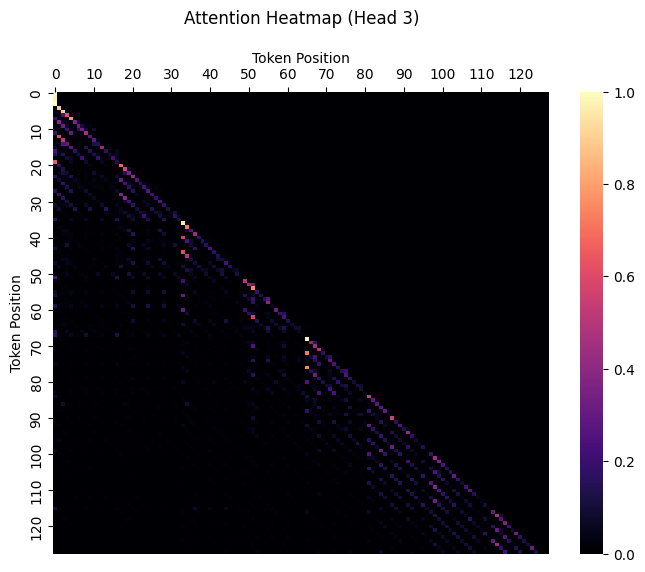

In [ ]:
def plot_attention_heatmap(data, head):
    slice_data = np.array(data[head][0][0])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(slice_data, cmap='magma', cbar=True, xticklabels=10, yticklabels=10)
    
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_label_position('top')
    
    plt.title(f"Attention Heatmap (Head {head})", pad=20)
    plt.xlabel("Token Position")
    plt.ylabel("Token Position")
    
    plt.show()

plot_attention_heatmap(attention_weights, 0)
plot_attention_heatmap(attention_weights, 1)
plot_attention_heatmap(attention_weights, 2)
plot_attention_heatmap(attention_weights, 3)


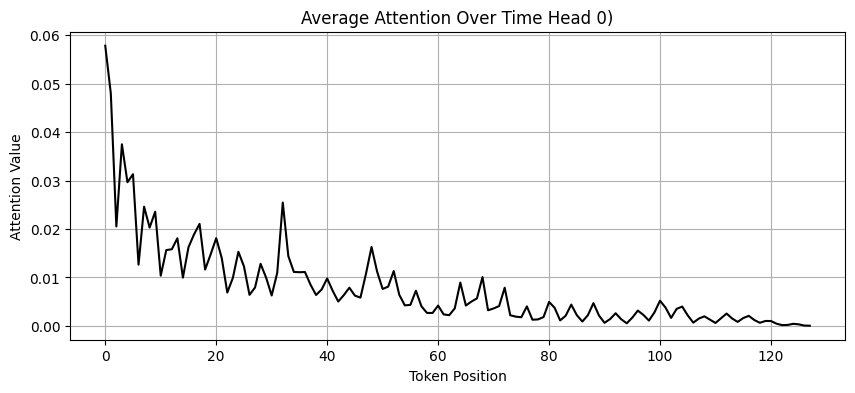

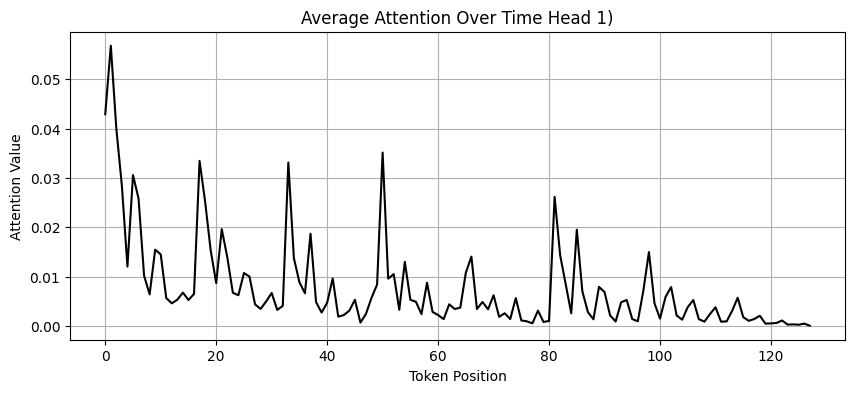

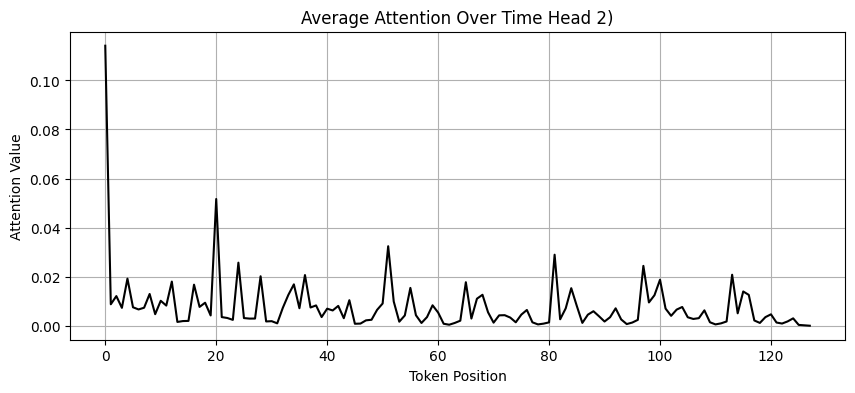

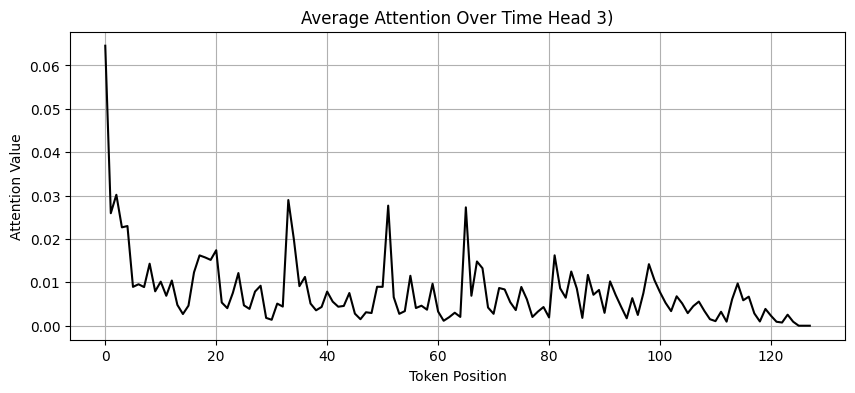

In [ ]:
def plot_avg_attention(data, head):
    slice_data = np.array(data[head][0][0])
    avg_attention = slice_data.mean(axis=0)

    plt.figure(figsize=(10, 4))
    plt.plot(avg_attention, color='black')
    plt.title(f"Average Attention Over Time Head {head}")
    plt.xlabel("Token Position")
    plt.ylabel("Attention Value")
    plt.grid(True)
    plt.show()

plot_avg_attention(attention_weights, 0)
plot_avg_attention(attention_weights, 1)
plot_avg_attention(attention_weights, 2)
plot_avg_attention(attention_weights, 3)




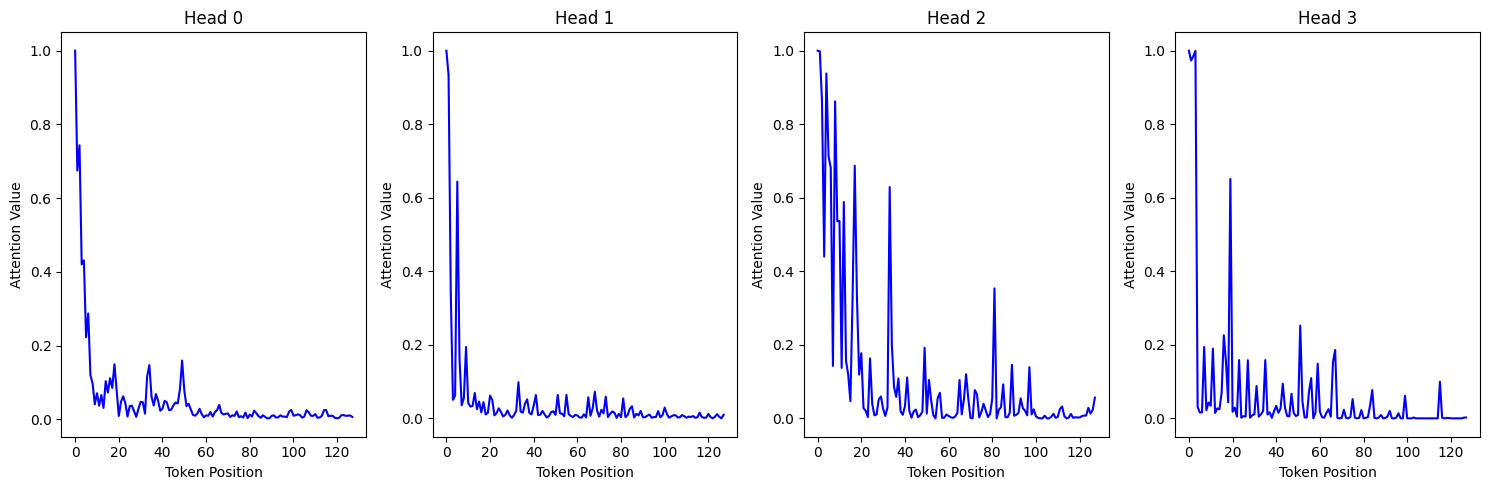

In [81]:
def plot_attention_for_token(data, token_index):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    
    for i in range(4):
        attention_values = np.array(data[i][0][0])[:, token_index]
        axes[i].plot(attention_values, color='blue')
        axes[i].set_title(f"Head {i}")
        axes[i].set_xlabel("Token Position")
        axes[i].set_ylabel("Attention Value")
    
    plt.tight_layout()
    plt.show()

plot_attention_for_token(attention_weights, token_index=0)
